In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil


import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns



In [31]:

data = pd.read_csv("train.csv")

In [32]:
wineries = data[["winery", "points", "price"]].groupby(by="winery").mean()
print( "Coeffitient of correlation: "+str(wineries["points"].corr(wineries["price"])) )

Coeffitient of correlation: 0.3459040045050576


Text(0, 0.5, 'Prices')

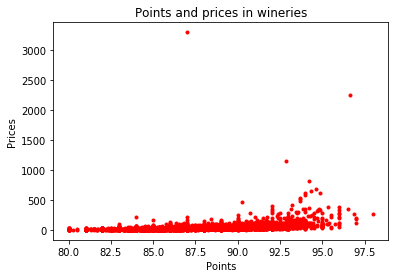

In [28]:
points = wineries["points"]
prices = wineries["price"]
plt.plot(points, prices, "r.")
plt.title("Points and prices in wineries")

plt.xlabel("Points")
plt.ylabel("Prices")

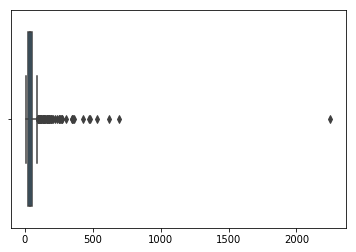

In [12]:
priceForPoint = wineries.groupby(by="points").mean()
sns.boxplot(priceForPoint)

In [29]:
priceForPoint

points
80.000000    16.273810
80.250000     9.000000
80.500000    11.500000
81.000000    15.751412
81.250000    15.250000
               ...    
93.777778    60.000000
93.888889    61.222222
94.125000    73.000000
94.140000    82.320000
94.181818    80.909091
Name: price, Length: 1273, dtype: float64

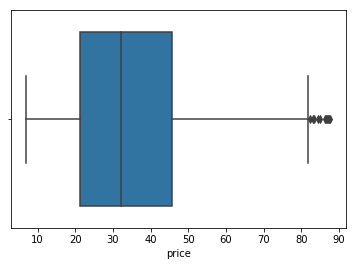

In [13]:
priceForPoint = priceForPoint["price"]
qR = priceForPoint.quantile(0.75)-priceForPoint.quantile(0.25)
delValues = []
for i in priceForPoint.index:
    if( priceForPoint[i]<priceForPoint.quantile(0.25)-1.5*qR or priceForPoint[i]>priceForPoint.quantile(0.75)+1.5*qR ):
        delValues.append(i)
priceForPoint = priceForPoint.drop( labels=delValues )
delValues = []
for i in priceForPoint.index:
    if( priceForPoint[i]<priceForPoint.quantile(0.25)-1.5*qR or priceForPoint[i]>priceForPoint.quantile(0.75)+1.5*qR ):
        delValues.append(i)
priceForPoint = priceForPoint.drop( labels=delValues )
delValues = []
for i in priceForPoint.index:
    if( priceForPoint[i]<priceForPoint.quantile(0.25)-1.5*qR or priceForPoint[i]>priceForPoint.quantile(0.75)+1.5*qR ):
        delValues.append(i)
priceForPoint = priceForPoint.drop( labels=delValues )

sns.boxplot(priceForPoint)

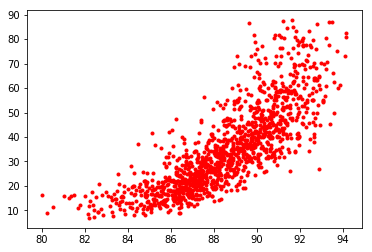

In [14]:
plt.plot( priceForPoint.index, priceForPoint, '.r' )

In [15]:
print( "Coeffitient of correlation: "+str( priceForPoint.corr(pd.Series(priceForPoint.index)) ) )

Coeffitient of correlation: 0.8907043965195149


In [16]:
countries = data[ ["country", "winery"] ].groupby(by="country").count().sort_values(by="winery")[::-1]
print(countries)

                winery
country               
US               38573
France           15948
Italy             9112
Portugal          3197
Chile             2891
Spain             2755
Argentina         2570
Austria           1892
Germany           1573
New Zealand       1121
Australia         1028
South Africa       727
Israel             320
Canada             176
Greece             139
Bulgaria            93
Romania             80
England             62
Slovenia            42
Mexico              38
Hungary             35
Moldova             35
Uruguay             33
Turkey              33
Lebanon             28
Brazil              28
Morocco             21
Georgia             12
Croatia             12
Ukraine             11
Peru                 8
Cyprus               6
Macedonia            5
Luxembourg           5
Switzerland          5
Serbia               4
Czech Republic       3
India                1


In [17]:
print( "Number of countries: "+str(len(countries)) )

Number of countries: 38


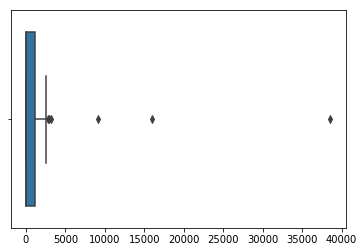

In [18]:
sns.boxplot(countries)

In [33]:


num_grapes = data[ ["winery", "variety"] ].groupby(by="winery").count()
max_num = num_grapes["variety"].max()
min_num = num_grapes["variety"].min()
k = 0

#print max number of grapes
print( "Max number: "+str(max_num) )
#print number of wineries which have max number of types of grapes
for i in range(len(num_grapes)):
    if( num_grapes["variety"][i]==max_num ):
        k+=1
print("This number of types of grapes use "+str(k)+" winery(ies).")

#print min number of grapes
print( "Min number: "+str(min_num) )
#print number of wineries which have max number of types of grapes
k = 0
for i in range(len(num_grapes)):
    if( num_grapes["variety"][i]==min_num ):
        k+=1
print("This number of types of grapes use "+str(k)+" winery(ies).")

Max number: 175
This number of types of grapes use 1 winery(ies).
Min number: 1
This number of types of grapes use 4196 winery(ies).


In [34]:
tasters = data[ ["user_name", "points"] ].groupby(by="user_name").mean()[::-1]
print(tasters)

                     points
user_name                  
@worldwineguys    88.681909
@winewchristina   86.250000
@wineschach       86.837981
@wawinereport     88.747335
@vossroger        88.709333
@vboone           89.324406
@suskostrzewa     86.146771
@paulgwine        89.107855
@mattkettmann     90.094230
@laurbuzz         87.756398
@kerinokeefe      89.169868
@gordone_cellars  88.569725
@bkfiona          86.750000
@JoeCz            88.292076
@AnneInVino       90.779170


In [35]:
print( data[ ["user_name", "points"] ].groupby(by="user_name").std()[::-1] )

                    points
user_name                 
@worldwineguys    2.106292
@winewchristina   2.986079
@wineschach       3.035543
@wawinereport     2.449455
@vossroger        3.081515
@vboone           3.029654
@suskostrzewa     2.370568
@paulgwine        2.817176
@mattkettmann     2.638522
@laurbuzz         2.590377
@kerinokeefe      2.581155
@gordone_cellars  2.767626
@bkfiona          1.860249
@JoeCz            2.796134
@AnneInVino       2.309977


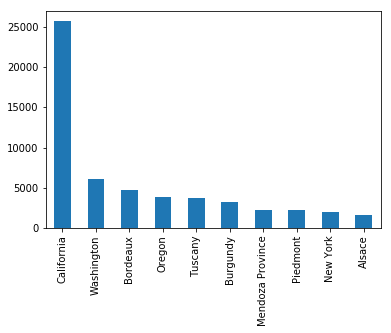

In [36]:
data['province'].value_counts().head(10).plot.bar()


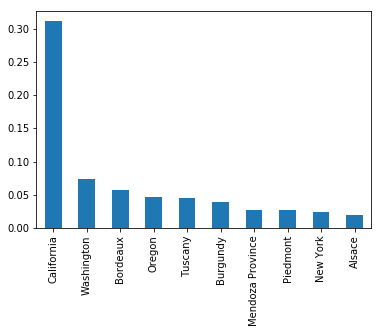

In [37]:
(data['province'].value_counts().head(10) / len(data)).plot.bar()

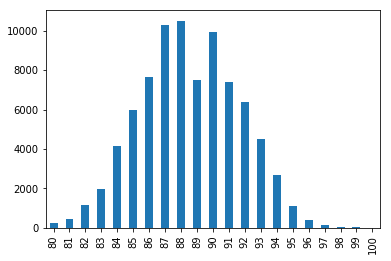

In [38]:
data['points'].value_counts().sort_index().plot.bar()